In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import torch

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [5]:
# CSV 파일에 접근
maml_norm_info = pd.read_csv('../MAML_filter64/MAML_filter64_inner_loop.csv')
arbiter_norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot_filter64/MAML+Arbiter_5way_5shot_filter64_inner_loop.csv')

# 훈련 정보만 가지고 온다
maml_norm_info_train = maml_norm_info[maml_norm_info['phase']=='train']
arbiter_norm_info_train= arbiter_norm_info[arbiter_norm_info['phase']=='train']

C:\Users\JM\anaconda3\envs\maml\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [22]:
arbiter_norm_info_mini_imagenet_full_size = arbiter_norm_info[arbiter_norm_info['current_iter']=='mini_imagenet_full_size']
arbiter_norm_info_tiered_imagenet = arbiter_norm_info[arbiter_norm_info['current_iter']=='tiered_imagenet']
arbiter_norm_info_CIFAR_FS = arbiter_norm_info[arbiter_norm_info['current_iter']=='CIFAR_FS']
arbiter_norm_info_CUB = arbiter_norm_info[arbiter_norm_info['current_iter']=='CUB']

In [23]:
arbiter_norm_info_mini_imagenet_full_size = arbiter_norm_info_mini_imagenet_full_size.groupby('num_step')
arbiter_norm_info_tiered_imagenet = arbiter_norm_info_tiered_imagenet.groupby('num_step')
arbiter_norm_info_CIFAR_FS = arbiter_norm_info_CIFAR_FS.groupby('num_step')
arbiter_norm_info_CUB = arbiter_norm_info_CUB.groupby('num_step')

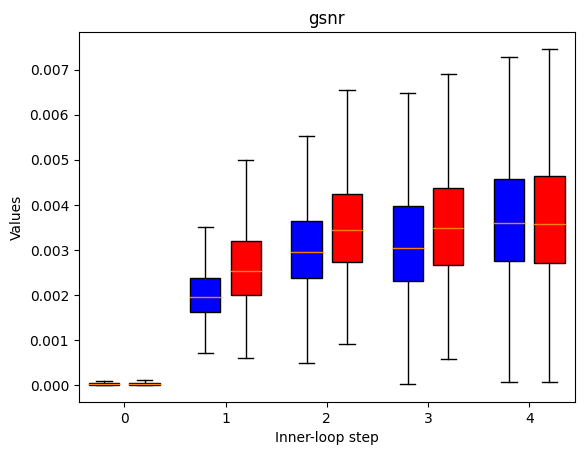

In [30]:
# 이상치 제거 함수 정의
def remove_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group >= lower_bound) & (group <= upper_bound)]

group_names = []
filtered_values_1 = []
filtered_values_2 = []

for name, group in arbiter_norm_info_mini_imagenet_full_size:
    group_values = group['gsnr']
    #group_values = remove_outliers(group_values)
    filtered_values_1.append(group_values)
    
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)
        
for name, group in arbiter_norm_info_CIFAR_FS:
    group_values = group['gsnr']
    #group_values = remove_outliers(group_values)
    filtered_values_2.append(group_values)

    
# 두 개의 박스플롯을 같은 x축에 그리기 위해 위치 조정
positions_1 = [i * 2.0 for i in range(len(filtered_values_1))]
positions_2 = [i * 2.0 + 0.8 for i in range(len(filtered_values_2))]



# 첫 번째 박스플롯
plt.boxplot(filtered_values_1, positions=positions_1, widths=0.6, patch_artist=True,
            boxprops=dict(facecolor='blue'), showfliers=False)

# 두 번째 박스플롯
plt.boxplot(filtered_values_2, positions=positions_2, widths=0.6, patch_artist=True,
            boxprops=dict(facecolor='red'), showfliers=False)

# x축 라벨 설정
plt.xticks([i * 2.0 + 0.4 for i in range(len(group_names))], group_names)

# 그래프 라벨 및 제목 설정
plt.xlabel('Inner-loop step')
plt.ylabel('Values')
plt.title('gsnr')

# 그래프를 표시합니다
plt.show()